In [1]:
# import system libraries
import numpy as np
import matplotlib.pyplot as plt### virtual fish swims with 0.12 m  circle without background
import pickle
%matplotlib inline

In [2]:
"""
Read saved data
"""
ReadData = True
if ReadData:
    filename = '../Data/fish/SpeedVSposition'
    infile   = open(filename,'rb')
    new_dict = pickle.load(infile)
    nsx_rf   = new_dict['nsx_rf']
    nsy_rf   = new_dict['nsy_rf']
    psxs_rf  = new_dict['psxs_rf']
    psys_rf  = new_dict['psys_rf']
    nsx_vf   = new_dict['nsx_vf']
    nsy_vf   = new_dict['nsy_vf']
    psxs_vf  = new_dict['psxs_vf']
    psys_vf  = new_dict['psys_vf']
    xlim     = new_dict['xlim']
    ylim     = new_dict['ylim']
    nbinx    = new_dict['nbinx']
    nbiny    = new_dict['nbiny']
    
    infile.close()


/home/liang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
/home/liang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


Text(0.03, 0.5, '$y$ (m)')

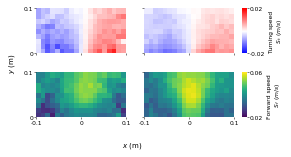

In [3]:
nsx_vf=nsx_rf = np.linspace(xlim[0],xlim[1],nbinx)
nsy_vf=nsy_rf = np.linspace(ylim[0],ylim[1],nbiny)

vmin,vmax     = -0.02,0.02


fig, axs = plt.subplots(ncols=2,nrows=2,sharex=True,
               sharey=True,figsize=(9/2.54,0.95*2))
plt.setp(axs.flat, aspect=1.0, adjustable='box')



ax = axs[0][0]
tmpax = ax.pcolor(nsx_rf,nsy_rf,psxs_rf,vmin=vmin,vmax=vmax,cmap='bwr',rasterized=True)

ax = axs[0][1]
tmpax = ax.pcolor(nsx_vf,nsy_vf,psxs_vf,vmin=vmin,vmax=vmax,cmap='bwr',rasterized=True)


fig.subplots_adjust(bottom=0.1, right=0.9, top=0.9, hspace=0.4)


height = axs[0][-1].get_position().height
y0 = axs[0][-1].get_position().p0[1]
cax = fig.add_axes([0.93, y0, 0.02, height])
hbar = fig.colorbar(tmpax,cax=cax)
hbar.ax.artists.remove(hbar.outline)   
hbar.set_clim([vmin,vmax])
hbar.set_ticks([vmin,vmax])
hbar.set_ticklabels([str(vmin),str(vmax)])
cax.set_ylabel('Turning speed \n $S_t$ ($m/s$)',fontsize=6)




vmin,vmax = 0.02,0.06

ax = axs[1][0]
tmpax = ax.pcolor(nsx_vf,nsy_vf,psys_rf,vmin=vmin,vmax=vmax,cmap='viridis',rasterized=True)
# tmpax = ax.pcolor(nsx_vf,nsy_vf,psys_rf,vmin=vmin,vmax=vmax,cmap='bwr',rasterized=True)

ax = axs[1][1]
tmpax = ax.pcolor(nsx_vf,nsy_vf,psys_vf,vmin=vmin,vmax=vmax,cmap='viridis',rasterized=True)
# tmpax = ax.pcolor(nsx_vf,nsy_vf,psys_vf,vmin=vmin,vmax=vmax,cmap='bwr',rasterized=True)

height = axs[1][-1].get_position().height
y0 = axs[1][-1].get_position().p0[1]
cax = fig.add_axes([0.93, y0, 0.02, height])
hbar = fig.colorbar(tmpax,cax=cax)
hbar.ax.artists.remove(hbar.outline)   
hbar.set_clim([vmin,vmax])
hbar.set_ticks([vmin,vmax])
hbar.set_ticklabels([str(vmin),str(vmax)])
cax.set_ylabel('Forward speed \n $S_f$ ($m/s$)',fontsize=6)


for ii in range(2):
    for jj in range(2):
        axs[ii][jj].spines['right'].set_visible(False)
        axs[ii][jj].spines['top'].set_visible(False)
        axs[ii][jj].spines['bottom'].set_visible(False)
        axs[ii][jj].spines['left'].set_visible(False)

        axs[ii][jj].set_xlim([-0.1,0.1])
        axs[ii][jj].set_xticks([-0.1,0,0.1])
        axs[ii][jj].set_xticklabels(['-0.1','0','0.1'])
        axs[ii][jj].set_ylim([0,0.1])
        axs[ii][jj].set_yticks([0,0.1])
        axs[ii][jj].set_yticklabels(['0','0.1'])
        
fig.text(0.5,-0.1, r'$x$ (m)', ha="center", va="center",fontsize = 7)
fig.text(0.03,0.5, r'$y$ (m)', ha="center", va="center", rotation=90,fontsize = 7)  